In [3]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display, stanford_mir
plt.rcParams['figure.figsize'] = (14,5)
stanford_mir.init()

In [4]:
training_features, training_labels, scaler = stanford_mir.get_features(collection="drum_samples_train", download=False)

In [5]:
print (training_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
print (training_features)

[[-0.77083333  0.21408013]
 [-0.94791667 -0.63850016]
 [-1.         -1.        ]
 [-0.84375     0.28042649]
 [-0.86458333 -0.57401509]
 [-0.875      -0.68632712]
 [-0.91666667 -0.61909633]
 [-0.88541667 -0.14992926]
 [-0.88541667 -0.42236805]
 [-0.82291667 -0.56555258]
 [ 0.30208333  0.82089701]
 [ 0.27083333  0.50606542]
 [ 1.          1.        ]
 [ 0.47916667  0.86547277]
 [ 0.44791667  0.78970844]
 [ 0.61458333  0.97125073]
 [ 0.19791667  0.76360631]
 [ 0.75        0.74981604]
 [ 0.34375     0.3510533 ]
 [ 0.79166667  0.83865713]]


Text(0,0.5,'Spectral Centroid')

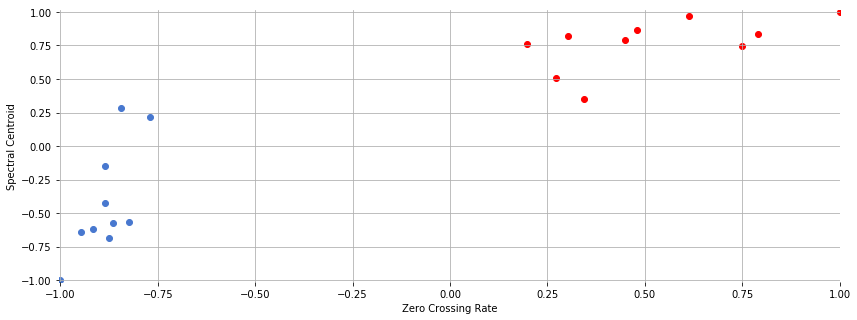

In [7]:
plt.scatter(training_features[:10,0], training_features[:10,1])
plt.scatter(training_features[10:,0], training_features[10:,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [8]:
test_features, test_labels, _ = stanford_mir.get_features(collection="drum_samples_test", scaler=scaler, download=False)

In [9]:
print (test_features.shape)

(60, 2)


In [10]:
print (test_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0,0.5,'Spectral Centroid')

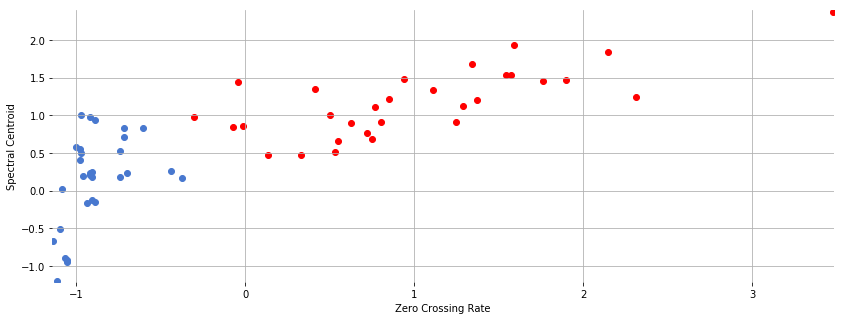

In [11]:
plt.scatter(test_features[test_labels==0,0], test_features[test_labels==0,1])
plt.scatter(test_features[test_labels==1,0], test_features[test_labels==1,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [12]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
#model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
#model = sklearn.svm.SVC()

In [13]:
model.fit(training_features, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
predicted_labels = model.predict(test_features)

In [15]:
predicted_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
tp = sum((test_labels == 1) & (predicted_labels == 1))
tn = sum((test_labels == 0) & (predicted_labels == 0))
fp = sum((test_labels == 0) & (predicted_labels == 1))
fn = sum((test_labels == 1) & (predicted_labels == 0))

In [17]:
print (tp, tn, fp, fn)

30 30 0 0


In [18]:
model.score(test_features, test_labels)

1.0

In [19]:
sklearn.metrics.recall_score(test_labels, predicted_labels)

1.0

In [20]:
recall = tp/float(tp+fn)
print (recall)

1.0


In [21]:
sklearn.metrics.precision_score(test_labels, predicted_labels)

1.0

In [22]:
precision = tp/float(tp+fp)
print (precision)

1.0


In [23]:
sklearn.metrics.f1_score(test_labels, predicted_labels)

1.0

In [24]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

1.0
